# Feature Study

In [1]:
import numpy as np
import pandas as pd

%pylab inline
import seaborn as sns
sns.set_style('darkgrid')

#some ipython options
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
priceLoc = '../input/Data_Supplementary_price.csv'
surveyLoc = '../input/Data_consumer_expenditure_survey.csv'
df_price = pd.read_csv(priceLoc, header=0, sep=',')
df_survey = pd.read_csv(surveyLoc, header=0, sep=',')

### replace '\\N' to nan
df_survey = df_survey.replace('\\N', np.nan)
df_survey['timeline'] = df_survey.year + df_survey.quarter*0.25

### consumers' age

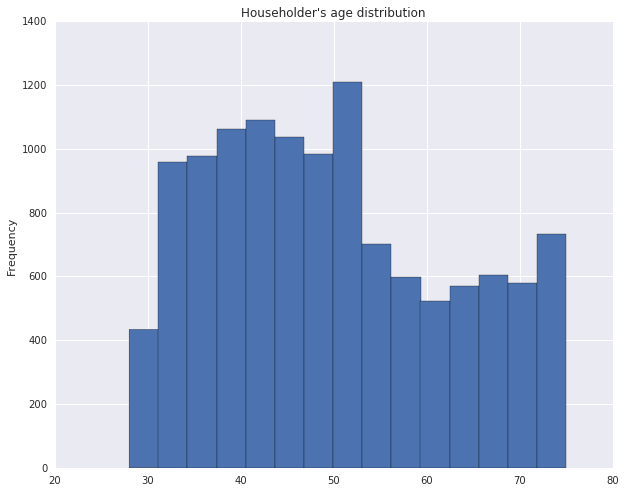

In [3]:
plt.figure()
df_survey.age.plot(kind='hist', bins=15, title="Householder's age distribution", figsize = (10, 8))

### income

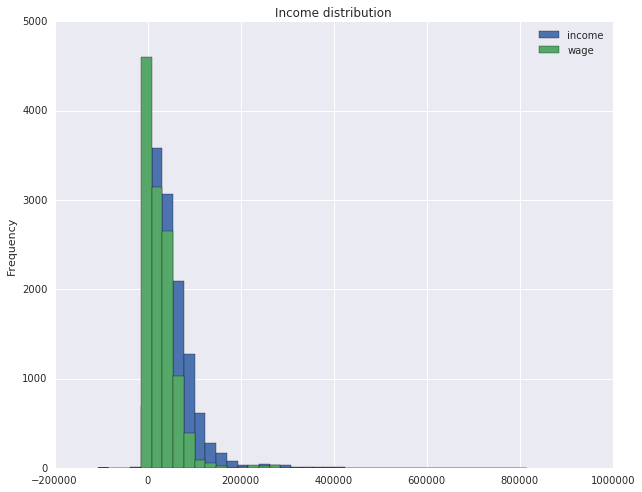

In [4]:
df_survey[['income','wage']].plot(kind='hist', bins=40, 
                                  title="Income distribution",
                                  figsize = (10, 8))

(-50000, 160000)

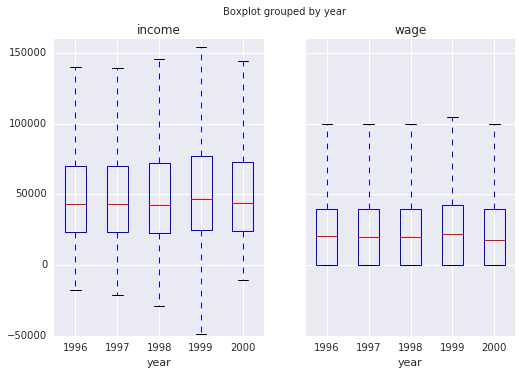

In [60]:
income_grp = df_survey.groupby('timeline')[['wage','income']]

df_survey.boxplot(column=['income','wage'],  by = 'year')
plt.ylim(-50000,160000)

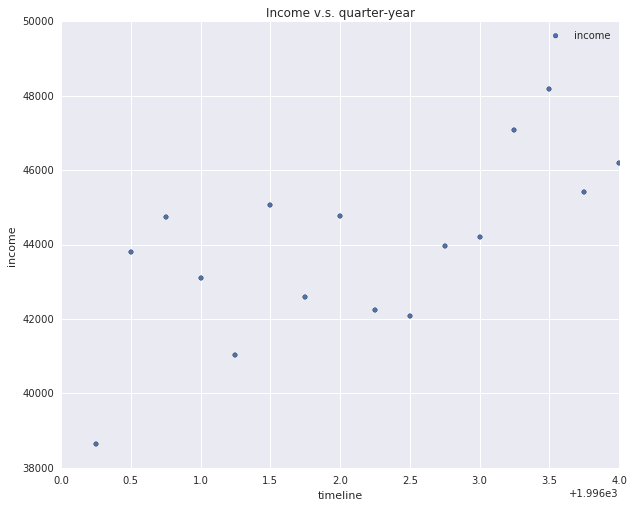

In [24]:
ax = income_grp.plot(kind='scatter', x = 'timeline', y = 'income', xlim = (1996, 2000),
               title="Income v.s. quarter-year",label='income',
              figsize = (10, 8))

### Services and Goods Columns

In [6]:
goods_cols = [ 'foodhome','foodout', 'foodwork', 'tobacco', 'alcohol',
               'clothes', 'tailors', 'jewelry', 'toiletry', 'renthome',
                'rentothr', 'furnish','housuppl','elect', 'gas', 'water',
               'homefuel', 'telephon',  'drugs', 'autos', 'parts', 'gasoline',
               'books']

services_cols = ['niteclub','hlthbeau', 'servants', 'orthopd', 'doctors', 'hospital',
                 'nurshome', 'helthins', 'busiserv', 'carservs', 'tolls', 'autoins',
                 'masstran', 'othtrans', 'airfare', 'pubs','recsport','othrec',
                 'gambling','highedu','lowedu', 'othedu', 'charity', 'insrefnd', 'intauto',
                 'intoth', 'rentnpay','homevalu', 'homeval2']

In [7]:
df_expstat = pd.concat([df_survey[goods_cols].div(df_survey.income, axis='index'), df_survey.income], axis = 1)

### Expenditure Percentage

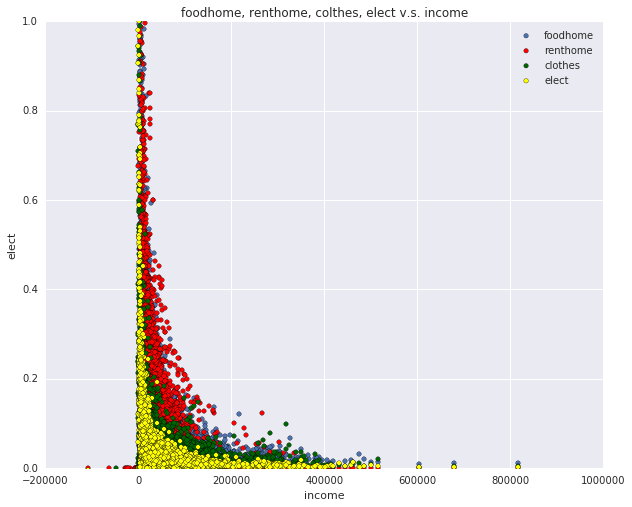

In [8]:
ax = df_expstat.plot(kind='scatter', x = 'income', y = 'foodhome', ylim = (0,1),
                      title="foodhome, renthome, colthes, elect v.s. income", label='foodhome',
                     figsize = (10, 8))

df_expstat.plot(kind='scatter', x = 'income', y = 'renthome', ylim = (0,1), color='Red',
                      label='renthome', ax = ax,
                     figsize = (10, 8))

df_expstat.plot(kind='scatter', x = 'income', y = 'clothes', ylim = (0,1), color='DarkGreen',
                       label='clothes', ax = ax,
                     figsize = (10, 8))

df_expstat.plot(kind='scatter', x = 'income', y = 'elect', ylim = (0,1), color='Yellow',
                       label='elect', ax = ax,
                     figsize = (10, 8))



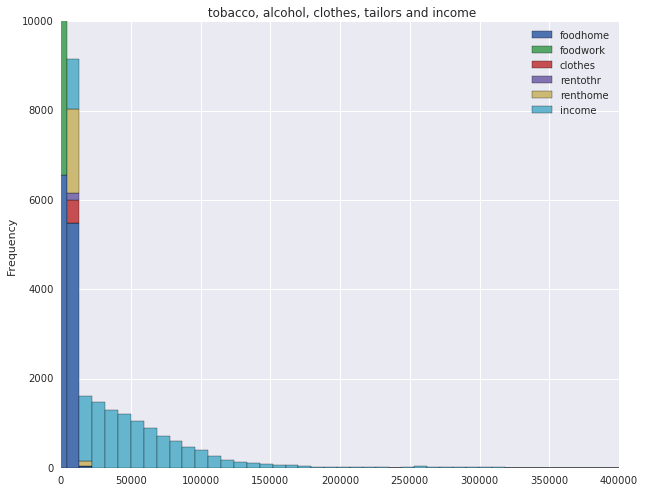

In [9]:
df_survey[['foodhome', 'foodwork','clothes',
           'rentothr', 'renthome','income']].plot(kind='hist', bins = 100,
                                                 xlim = (10, 400000), ylim = (0, 10000),
                                                 title=" tobacco, alcohol, clothes, tailors and income",
                                                 stacked=True, figsize = (10, 8))

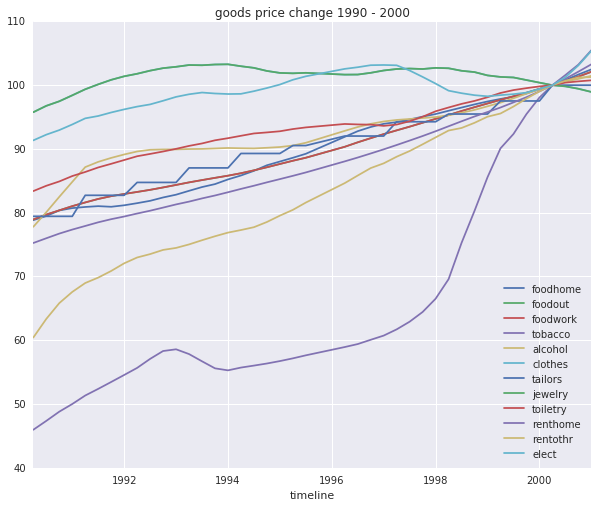

In [127]:
df_price['timeline'] = df_price.year + df_price.quarter*0.25
df_price.rename(columns=lambda x: x.replace('_price', ''), inplace=True)

df_price.plot(kind='line', x = 'timeline', y = ['foodhome','foodout', 'foodwork', 'tobacco', 'alcohol',
               'clothes', 'tailors', 'jewelry', 'toiletry', 'renthome',
                'rentothr', 'elect'],
              title="goods price change 1990 - 2000",
              stacked=False, figsize = (10, 8))

## Total Region Market

In [ ]:
total[expendCols] = df_survey[expendCols].sum()

# Feature Prep Data

In [178]:
oneHotCols = ['educatio', 'race','sex','emplcont', 'incoll','nonwork',
               'empstat','emptype','occup','indust','blsurbn','region',
               'cutenur','pubhous','repstat','srepstat']

familCols = ['educatio', 'race','sex','emplcont', 'weeksin','incoll',
                 'nonwork','empstat','emptype','hrswkd','wkswkd','occup',
                 'indust','fedtax', 'gvpremia','pripemia','rrpremia','statax',
                 'farminc','irakeogh','fica','businc','wage','socbens','ssi',
                 # The twelve elements of the array are the same as MEMBINC(12), 
                 #these are first quarter values. for laggesd Memnber
                 'lag_fedtax', 'lag_gvpremia', 'lag_pripemia','lag_rrpremia',
                 'lag_statax', 'lag_farminc', 'lag_irakeogh', 'lag_fica',
                 'lag_businc', 'lag_wage', 'lag_socbens','lag_ssi',
                 'blsurbn', 'region','cutenur', 'pubhous','repstat',
                 'srepstat', 'totwt', 'adjwt','numearn','numauto','vehq','membcnt',
                 'wages','farm','rents','div','interest','workcomp','unemp','socsec',
                 'pension','welfare','scholar','foodstmp','sspremia','pproptax','othtax','nontax',
                  #housing
                 'insrefnd','ohint','ohtax', 'ohprinc', 'ohlump', 'ohsold','ohbuy', 'ohmort1',
                 'ohmort2', 'housadd', 'ohtrans','checkng','dcheckng','saving',
                  #banking
                 'dsaving','securi','dsecuri','carloan', 'tradein', 'carsold','carprinc','investb',
                  #Children
                 'num_child', 'child_1_2','child_3_5', 'child_6_13', 'child_14_17_m','child_14_17_f',
                  'child_18_21_m', 'child_18_21_f','num_over15', 'num_under15',
                  'income', 'year']

servCols = ['niteclub','hlthbeau','renthome','rentothr','servants','doctors',
                 'hospital', 'nurshome','helthins','busiserv','lifeins','carservs',
                'tolls', 'autoins','masstran','othtrans','airfare','pubs','recsport',
                'gambling', 'highedu','lowedu','othedu','charity', 'intauto', 'intoth',
                'rentnpay', 'homevalu','homeval2','domestic_svcs', 'transport']

expendCols = [ 'foodhome','foodout','foodwork', 'tobacco', 'alcohol', 'clothes', 'tailors', 'jewelry',
                     'toiletry',  'furnish', 'housuppl','elect', 'gas', 'water', 'homefuel', 'telephon',
                     'drugs', 'orthopd', 'autos', 'parts', 'gasoline', 'books','othrec','ohmaint',
                     'foodin', 'foodaway','food','rent','clothes_pcare','utility','alc_tob',
                     'ent', 'other_nd','nondurable','nondurable_housing','nondurable_core',
                    'nondurable_housing_adj','nondurable_core_food']

In [179]:
def prepFeatureData(df, oneHotCols, familCols,servCols, expendCols):
    ###
    #
    #hackish data prep script
    #Takes in a raw dataset 
    #adds on a train/test split column,
    #runs an imputation stratagy based off of the following arguements:
    #returns DF along with numpy objects and final feature list    
    #
    ###
    import pandas as pd
    import numpy as np
    import datetime
    print ("prepFeatureData start: %s" % datetime.datetime.now())
    
    
    #build the feature dataframe by getting rid of everything not needed
    featureDF = df[familCols+ servCols + expendCols]
    
    yCols = expendCols
    
    #1-hot encoding is mapping a categorical variable of cardinality N to N boolian variables
    featureDF = pd.get_dummies(featureDF, 
                   columns = oneHotCols,
                   prefix = oneHotCols,
                   prefix_sep = '_',
                   dummy_na = False)
    
   
    #test/training split (this is a stupid way of doing this but works- TODO make less stupid)
    # we create a new column named 'train' with a 1/0 value based off of a probabilistic split (default is 80/20)
    train = featureDF[featureDF.year <= 1998]
    test = featureDF[featureDF.year > 1998]
    
    
    #build an imputer object and run on train and test to build imputed values
    #it is important for this to happen seperatly on the train and test sets to avoid leakage
    train.fillna(train.mean(), inplace=True)
    test.fillna(test.mean(), inplace=True)
    
    #knit the training and test sets back together
    featureDF = train.append(test)
    featureDF = featureDF.drop(yCols, axis = 1)
    
    # build XList
    # we need to rebuild this since we have a bunch of new columns
    XList = featureDF.columns.tolist()
   
    train.fillna(-1)
    test.fillna(-1)
    #return train/test datasets, the df, and the new columns list
    X_train = train[XList].values.astype(np.float64)
    X_test = test[XList].values.astype(np.float64)
    y_train = train[yCols].values.astype(np.float64)
    y_test = test[yCols].values.astype(np.float64)
    print ("prepFeatureData end: %s" % datetime.datetime.now())
    return train, test, y_train, X_train, y_test, X_test, yCols, XList

In [201]:
featureDF = df_survey[familCols+  expendCols]

In [202]:
yCols = expendCols
featureDF = pd.get_dummies(featureDF, 
                   columns = oneHotCols,
                   prefix = oneHotCols,
                   prefix_sep = '_',
                   dummy_na = False)
train = featureDF[featureDF.year <= 1998]
test = featureDF[featureDF.year > 1998]
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
featureDF = train.append(test)
featureDF = featureDF.drop(yCols, axis = 1)

In [203]:
XList = featureDF.columns.tolist()

In [204]:
X_train = train[XList].values.astype(np.float64)
X_test = test[XList].values.astype(np.float64)
y_train = train[yCols].values.astype(np.float64)
y_test = test[yCols].values.astype(np.float64)

# Predictions and Metric

In [180]:
#df_survey = df_survey[oneHotCols].fillna(-1)
feat_train, feat_test, y_train, X_train, y_test, X_test, yCols, XList = prepFeatureData(df_survey, oneHotCols, 
                                                                          familCols,servCols, expendCols)

prepFeatureData start: 2016-01-19 20:05:19.689291
prepFeatureData end: 2016-01-19 20:06:15.745697


In [197]:
from sklearn.ensemble import RandomForestRegressor as RFreg

#build a random forest Regression

rfreg = RFreg(n_estimators= 500, n_jobs = 8,
           min_samples_split = 20, min_weight_fraction_leaf =0.0001,
           verbose = 0)

# train the model on the data
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0001,
           n_estimators=500, n_jobs=8, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [198]:
y_pred = rfreg.predict(X_test)

## R2 score

In [199]:
print "R2 = ", rfreg.score(X_test, y_test)

R2 =  0.742637233678


## Family + Service : Feature importance


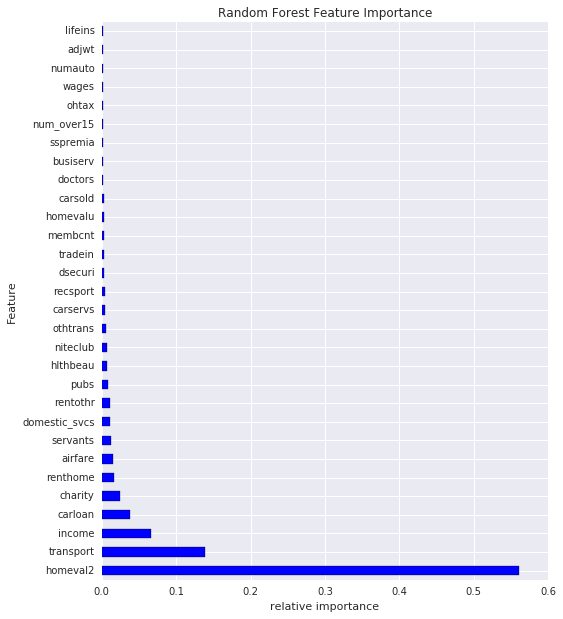

In [200]:
rfFImportance = pd.DataFrame(sorted(zip(map(lambda x: round(x, 5), rfreg.feature_importances_), XList), 
                 reverse=True), columns=['Importance','Feature'])

drf = rfFImportance.head(30)
rfFImportance['Importance'] = rfFImportance['Importance'] / rfFImportance['Importance'].sum()

plt.figure()
drf.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(8, 10))
plt.title('Random Forest Feature Importance')
plt.xlabel('relative importance')

## Family only

In [ ]:
feat_train, feat_test, y_train, X_train, y_test, X_test, yCols, XList = prepFeatureData(df_survey, oneHotCols, 
                                                                          familCols,[], expendCols)

In [205]:
from sklearn.ensemble import RandomForestRegressor as RFreg

#build a random forest Regression

rfreg = RFreg(n_estimators= 500, n_jobs = 8,
           min_samples_split = 20, min_weight_fraction_leaf =0.0001,
           verbose = 0)

# train the model on the data
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0001,
           n_estimators=500, n_jobs=8, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [206]:
print "R2 = ", rfreg.score(X_test, y_test)

R2 =  0.522039797077


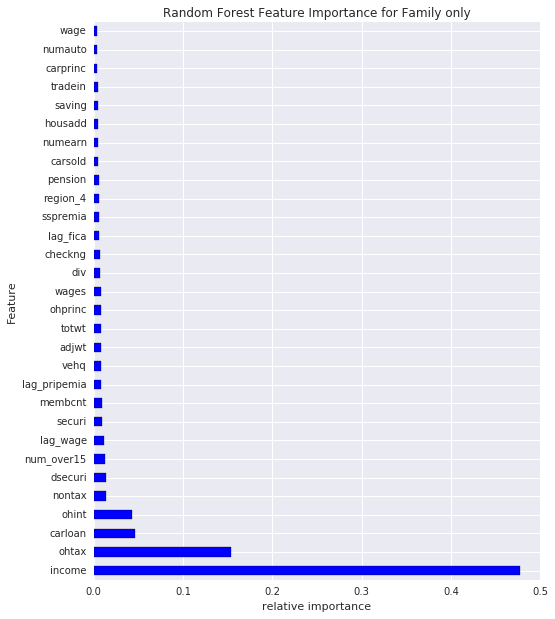

In [208]:
rfFImportance = pd.DataFrame(sorted(zip(map(lambda x: round(x, 5), rfreg.feature_importances_), XList), 
                 reverse=True), columns=['Importance','Feature'])

drf = rfFImportance.head(30)
rfFImportance['Importance'] = rfFImportance['Importance'] / rfFImportance['Importance'].sum()

plt.figure()
drf.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(8, 10))
plt.title('Random Forest Feature Importance for Family only')
plt.xlabel('relative importance')

### Models and Feature importance

In [80]:
from sklearn.datasets import load_boston

In [83]:
dataset = load_boston()
X_full, y_full = dataset.data, dataset.target

In [115]:
featureDF = df_survey[familCols+ expendCols + servCols]
featureDF.fillna(-1).head()
featureDF = pd.get_dummies(featureDF, 
                   columns = oneHotCols,
                   prefix = oneHotCols,
                   prefix_sep = '_',
                   dummy_na = False)